# Semana Python EmpowerData Aula 4

## Utilização de IA para análises Preditivas


## Importando bibliotecas

In [16]:
!pip install yfinance prophet

In [17]:
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

## Carregando os dados históricos

In [18]:
ticker = input("Digite o código da ação desejada: ")
dados = yf.Ticker(ticker).history("2y")

Digite o código da ação desejada: PETR4.SA


## Gráfico de variação do período histórico

<AxesSubplot:xlabel='Date'>

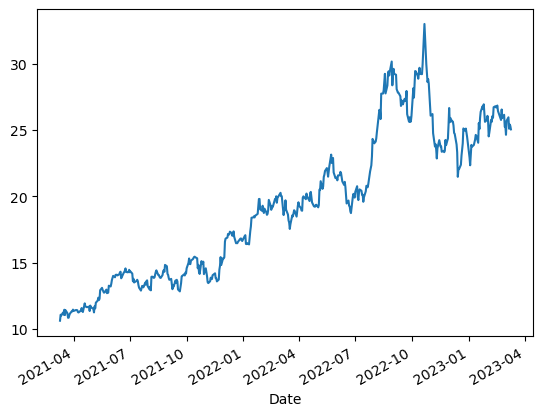

In [19]:
dados.Close.plot()

## Preparando os dados de treinamento

In [20]:
# resetando o indice do DataFrame
treinamento = dados.reset_index()

In [21]:
# retirando o timezone (fuso horário) da coluna de data
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)

In [22]:
# selecionando as colunas de data e valor de fechamento
treinamento = treinamento[["Date", "Close"]]

In [23]:
# renomeando as colunas (o Prophet precisa receber os dados com esse padrão)
treinamento.columns = ["ds", "y"]

## Treinando o nosso modelo

In [24]:
# criando o modelo
modelo = Prophet()

# treinando o modelo com os dados de treinamento
modelo.fit(treinamento)

# especificando o período das previsões (em dias)
periodo = modelo.make_future_dataframe(periods=90)

# gerando as previsões
previsoes = modelo.predict(periodo)

11:16:36 - cmdstanpy - INFO - Chain [1] start processing
11:16:36 - cmdstanpy - INFO - Chain [1] done processing


## Gerando o gráfico de previsões

In [28]:
fig = plot_plotly(modelo, previsoes, xlabel="periodo", ylabel="valor")
fig.write_html("Grafico Preditivo.html")
fig